In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline
sns.set_style('darkgrid')

In [16]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [17]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [18]:
df.drop("gameId",axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [20]:
df = df.loc[:,~df.columns.str.startswith('red')]

<Figure size 1080x1080 with 0 Axes>

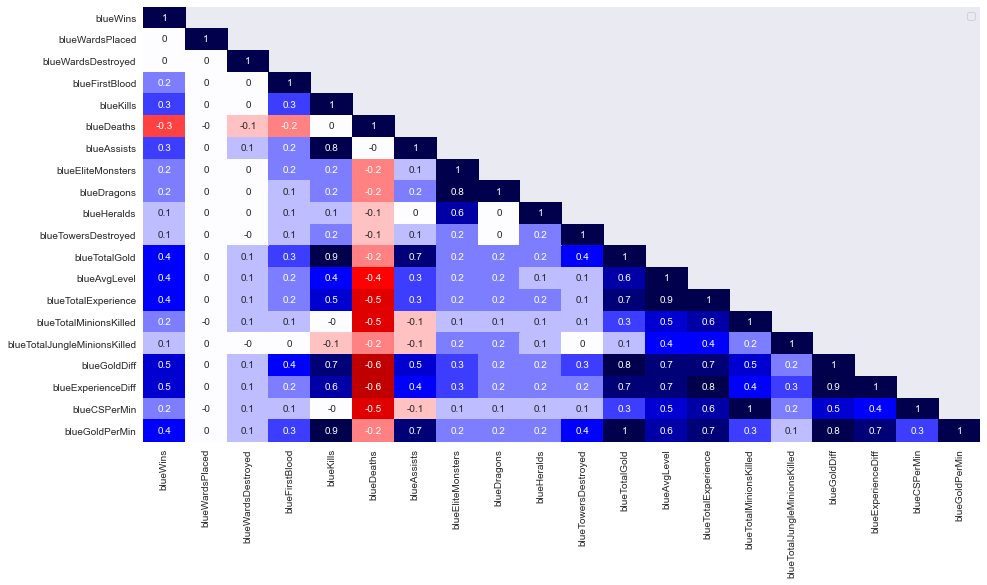

In [21]:
plt.figure(figsize=(15,15))
corrmat = df.corr()
corrmat = np.tril(corrmat)
corrmat[corrmat==0] = None
corrmat = corrmat.round(1)
labels = df.select_dtypes(include='number').columns.values
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrmat, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
plt.legend('')

plt.show()

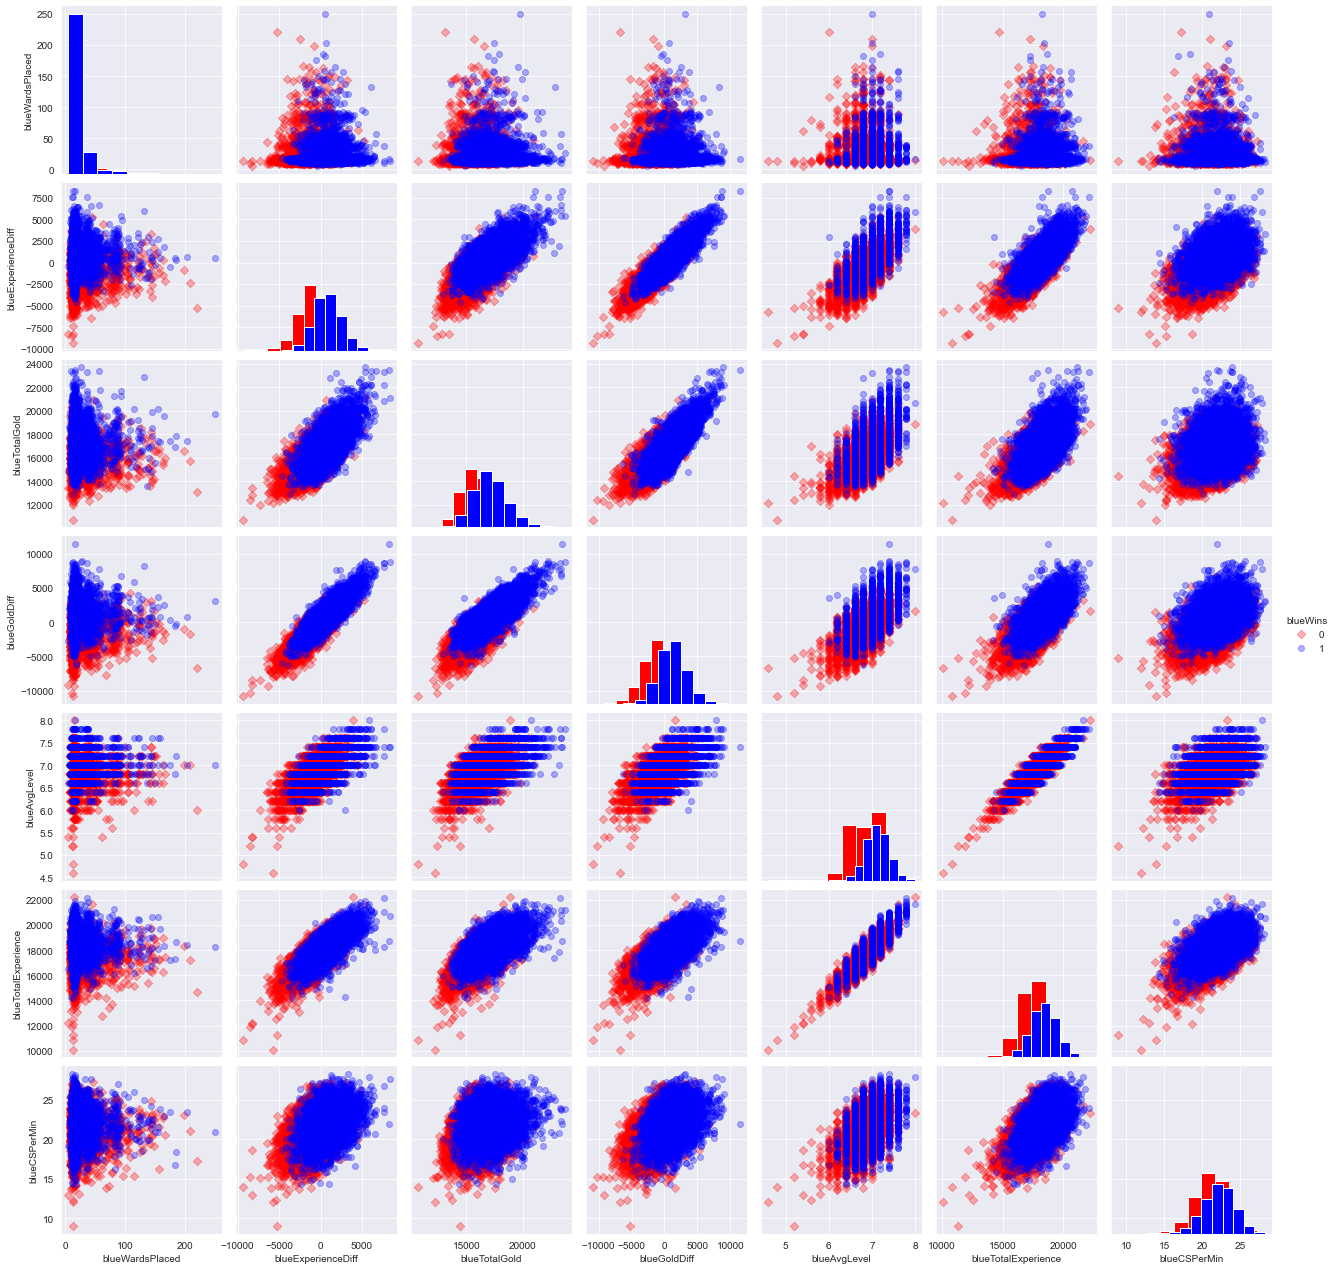

In [22]:
g = sns.PairGrid(data = df, vars=['blueWardsPlaced', 'blueExperienceDiff', 'blueTotalGold', 'blueGoldDiff', 'blueAvgLevel', 'blueTotalExperience','blueCSPerMin'], hue='blueWins', palette=sns.color_palette(['r', 'b']), hue_kws={"marker": ["D", "o"], "alpha": [0.3, 0.3]})
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

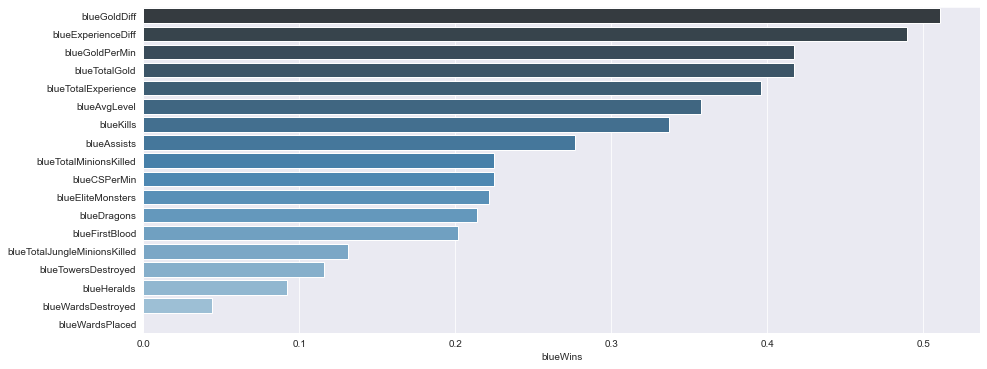

In [23]:
plt.figure(figsize=(15,6))
dfw = df.corr()['blueWins'].drop(['blueWins', 'blueDeaths'])
dfw = dfw.sort_values(ascending=False)

pal = sns.color_palette("Blues_d", len(dfw))
rank = dfw.argsort().argsort() 

sns.barplot(y=dfw.index, x=dfw, palette=np.array(pal[::-1])[rank])

plt.show()

## Summary

1. In league of legends to win a game, gold and experience is the most important part of the game.
2. As shown above GoldDiff has highest correlation among others.
3. Gettting ahead on the experience makes a lots of difference on winning the game.
4. Interestingly placing wards doesn't have any impact on wining the game. That's a bit shocking.
